In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as path
import os
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Minimos.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file
Data = pd.read_csv(Path_)

In [3]:
x=Data.x
y=Data.y

In [4]:
def M(x,v):
    return v[0]/(v[1]+np.e**(-v[2]*x))

In [5]:
def costoM(v,x,y):
    suma=[]
    N=len(x)
    sigma=np.ones_like(y)
    for i in range(N):
        suma.append(((y[i]-M(x,v))/(sigma[i]))**2)
    suma=sum(suma)
    return suma

In [6]:
def DMv0(x,v):
    return 1/(v[1]+np.e**(-v[2]*x))

def DMv1(x,v):
    return -v[0]/(v[1]+np.e**(-v[2]*x))**2

def DMv2(x,v):
    return v[0]*x*np.e**(-x*v[2])/(v[1]+np.e**(-v[2]*x))**2

In [7]:
def actualizarV(v,x,y,g):
    vres=np.zeros_like(v)
    N=len(x)
    
    z=y-M(x,v)
    suma0=z*DMv0(x,v)
    suma0=sum(suma0)
    suma1=z*DMv1(x,v)
    suma1=sum(suma1)
    suma2=z*DMv2(x,v)
    suma2=sum(suma2)
    
    vres[0]=v[0]-g*(-2*suma0)
    vres[1]=v[1]-g*(-2*suma1)
    vres[2]=v[2]-g*(-2*suma2)
    
    return vres

In [8]:
v0=np.array([1.0,1.0,1.0])
v=[]
E=0.01
it=0
for i in range(10**4):
    v=actualizarV(v0,x,y,10**-3)
    it+=1
    
    if abs(np.linalg.norm(v)-np.linalg.norm(v0))<=E:
        break
    
    else:
        v0=v
print("El numero de iteraciones con g=1*10^-3 es:")
print(it)

El numero de iteraciones con g=1*10^-3 es:
7


In [9]:
vg1=v

In [10]:
v0=np.array([1.0,1.0,1.0])

it=0
for i in range(10**4):
    v=actualizarV(v0,x,y,5*10**-4)
    it+=1
    
    if (abs(v[0]-v0[0])<=E) and (abs(v[1]-v0[1])<=E) and (abs(v[2]-v0[2])<=E):
        break
    
    else:
        v0=v
print("El numero de iteraciones con g=5*10^-4 es:")
print(it)

El numero de iteraciones con g=5*10^-4 es:
84


In [11]:
vg2=v

In [12]:
X=np.linspace(-10,10,2000)
Y1=M(X,vg1)
Y2=M(X,vg2)

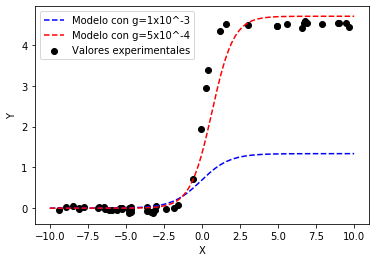

In [13]:
plt.scatter(x,y,color='k',label="Valores experimentales")
plt.plot(X,Y1,color='b',label="Modelo con g=1x10^-3",linestyle="--")
plt.plot(X,Y2,color='r',label="Modelo con g=5x10^-4",linestyle="--")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend()
plt.show()

In [14]:
## Es evidente que con este criterio de parada g=1*10^-3 no logra un buen modelo
## Sin embargo, aumentar el criterio de parada aumenta el numero de iteraciones y
## el algoritmo toma más tiempo. Este ejercicio sirve para mostrar como cambiar g
## sirve para mantener un tiempo responsable y lograr un buen modelo